# Innis Classification Project
>By Stephen Kipkurui


# Project Overview

## Customer Churning, why? 


>### This project aims to statistically explore and formulate the factors that contribute to observed increase in customer churning at Telco Company with a main focus to answer the question '..why are customers parting ways with company services?' Inferred findings are to be used in advicing possible measures to be implemented to reduce the current customer loss rate. 

# Procedure

>## (1). Acquire data

>## (2). Exploratory data analysis (Find drivers for churn)

>## (2). Split the data into 3 sets

>## (3). Visualize the distributions

>## (4). Choose a hypothesis

>## (5). Evaluate best Model

>## (6). Make recommendations

# STEP 1: Acquire the main dataframe (Project valid as of: 03/10/2022)

In [5]:
# Call acquire module and call function get_telco data to get telco data

telco = acquireTelco.get_telco_data() 


	Program Status: Reading Raw Telco Data from a local cached csv file...


# STEP 2:  Exploratory Data Analysis 

>##  PURPOSE:  - Explore data to discover driver(s) for churn  on our target variables 


>## Clean, encode categorical data and split into train, validate, and test 


>## Understand drivers


# Import required Modules

In [6]:
# Python import libraries for statistical infference, manipulations and visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import env
import acquireTelco
import prepareTelco

from acquireTelco import get_telco_data
from acquireTelco import clean_train_data
from acquireTelco import clean_validate_data
from acquireTelco import clean_test_data
from prepareTelco import clean_split_telco_data


import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# STEP 3: Split the data

In [7]:
# Split data and save separate files of train, validate, test

train, validate, test = clean_split_telco_data(telco)

# Verify split ratios 

print(f'\n\tTrain Data: {train.shape} \n\tValidate Data:{validate.shape}\n\tTest Data: {test.shape}')


	Train Data: (5497669, 14) 
	Validate Data:(2463974, 14)
	Test Data: (2064720, 14)


## Train test, validate & test


>### Train: 56%

>### Validate: 24%

>### Test: 20%


In [8]:
train_df = clean_train_data() # acquire cleaned train dataset
validate_df = clean_validate_data()# acquire cleaned validated dataset
test_df = clean_test_data()# acquire cleaned test dataset


	Program Status: Reading cleaned train data from a local cached csv file...

	Program Status: Reading cleaned validate data from a local cached csv file...

	Program Status: Reading cleaned test data from a local cached csv file...


# STEP 4: Visualize features relationships 

>## Visualize Distributions: 
>>### A. Overall churned vs non-churned customers
>>### B. Overall paperless vs non paperless customers
>>### C. Overall phone customers

>## Dive deeper:
>>### D. Churned vs non-churned paperless billing customers



# Project Features of interest:

>### -  How does **churn** rate vary?
>### -  **Billing format**, in theory may play big role in churning, can we find any effect of this feature?

>#### Visualize relationship of categorical variables relatioships to target variable
> (using **train data set** moving forward)

### Initial Hypothesis 


#### Ho: Phone customers utlizing paperless billing  are less likely to churn than phone customers who do not


#### H1: Phone customers utlizing paperless billing  are likely to churn than phone customers who do not

>### Create churn vs non-churn customers datasets

In [9]:
# churned dataset

churned_df = train_df[train_df.enc_churn == 1]
non_churned_df = train_df[train_df.enc_churn == 0]

### Step I. Overall churn rate 

<function matplotlib.pyplot.show(close=None, block=None)>

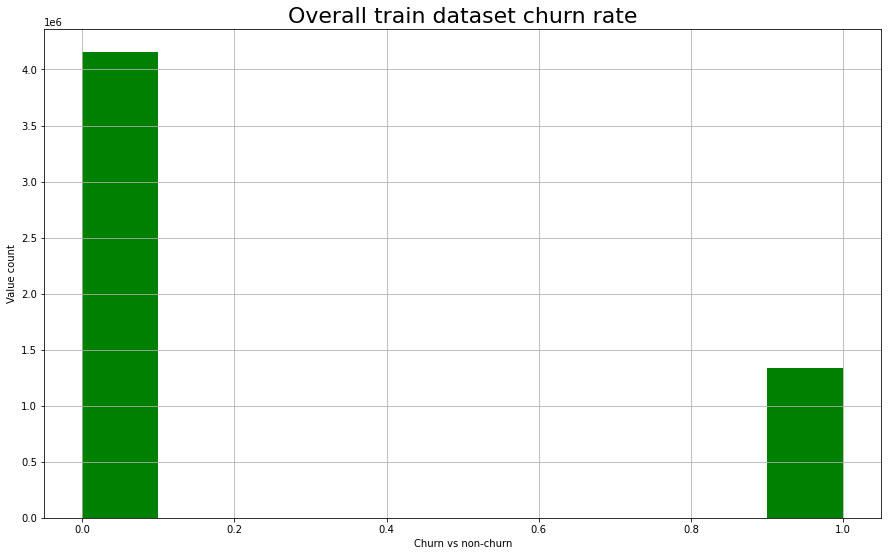

In [10]:
# Histogram (train dataset churn rate)

plt.figure(figsize = (15, 9))
plt.title('Overall train dataset churn rate', color = 'black', size = 22)

train_df.enc_churn.hist(color = 'green')
plt.ylabel('Value count')
plt.xlabel('Churn vs non-churn')
plt.show

### KEY: 

### '1' == Churn 

### '0' != churn 


>### --->  OBSERVATION: Overall approx 33% or 1 in 3 of our customers are churning

> ### What does this mean?


## Step II. Expore overall paperless billing distribution 

<function matplotlib.pyplot.show(close=None, block=None)>

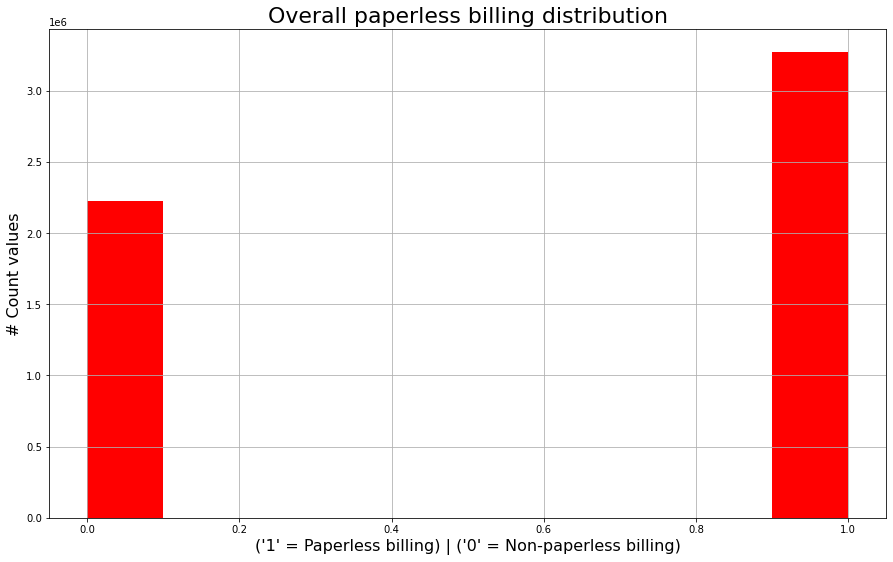

In [11]:
# Histogram (Proportion of paperless billing customers)

plt.figure(figsize = (15, 9))
plt.title('Overall paperless billing distribution', color = 'black', size = 22)
train_df.enc_paperless_billing.hist(color = 'red')
plt.ylabel('# Count values', color = 'black', size = 16)
plt.xlabel('(\'1\' = Paperless billing) | (\'0\' = Non-paperless billing)', color = 'black', size = 16)

plt.show

### --> Obeservation: Approximately 60% of Telco customers are using paperless billing


### Let's explore this group of our data further...

In [12]:
# churned paperless billing 

churned_paperless_bill = train_df[train_df.enc_churn == 1].enc_paperless_billing
non_churned_paperless_bill = train_df[train_df.enc_churn == 0].enc_paperless_billing

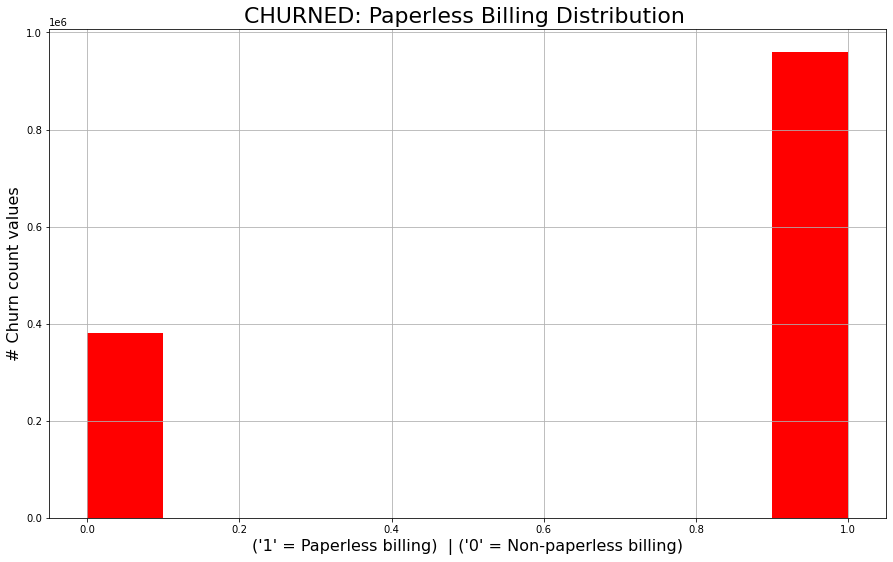

In [13]:
# Histogram (Proportion of phone services customers)

plt.figure(figsize = (15, 9))
plt.title('CHURNED: Paperless Billing Distribution ', color = 'black', size = 22)
churned_paperless_bill.hist(color = 'red')
plt.ylabel('# Churn count values', color = 'black', size = 16)
plt.xlabel('(\'1\' = Paperless billing)  | (\'0\' = Non-paperless billing)', color = 'black', size = 16)
plt.show()

>### ---> OBSERVATION: More than half of our customers that churned use paperless billing

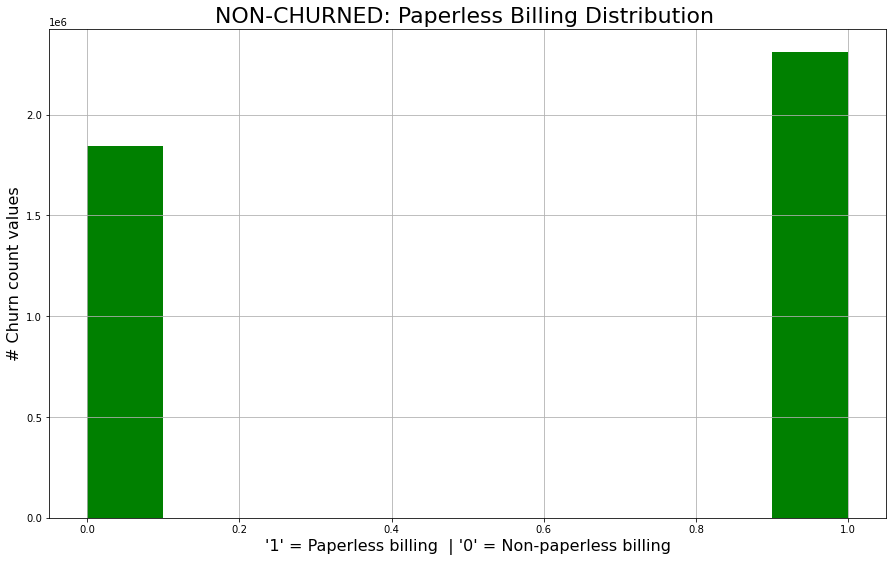

In [15]:
# Histogram (Proportion of phone services customers)

plt.figure(figsize = (15, 9))
plt.title('NON-CHURNED: Paperless Billing Distribution ', color = 'black', size = 22)
non_churned_paperless_bill.hist(color = 'green')
plt.ylabel('# Churn count values', color = 'black', size = 16)
plt.xlabel('\'1\' = Paperless billing  | \'0\' = Non-paperless billing', 
           color = 'black', 
           size = 16)
plt.show()

## Deeper Examinations

>### Examine Papeless Billing Comparance (churned vs non-churned)


In [16]:

churned_paperless_billed_mean = churned_df.enc_paperless_billing.mean()

non_churned_paperless_billed_mean = non_churned_df.enc_paperless_billing.mean()

plt.figure(figsize = (15, 10))
print()
print(f'Churned customers using Paperless billing (mean): {churned_paperless_billed_mean:.2%}')
print()
print(f'Non-Churned customers using Paperless billing (mean): {non_churned_paperless_billed_mean:.2%}')
print()
print('------------------------------------------')
print('--->  [[OBSERVATION]]: Equal proportion of churn vs no churn among phone customers alone')
print('------------------------------------------')



Churned customers using Paperless billing (mean): 71.63%

Non-Churned customers using Paperless billing (mean): 55.61%

------------------------------------------
--->  [[OBSERVATION]]: Equal proportion of churn vs no churn among phone customers alone
------------------------------------------


<Figure size 1080x720 with 0 Axes>

# Key Summary Observations



- ### Overall: Churning customers is approximately 1/3 of non-churning customers
- ### Overall: Approximately 60% of Telco customers are using paperless billing
- ### Churned customers using Paperless billing (mean): 71.63%



# STEP 5: Why are paperless billing less prefferable? 

# HYPOTHESIS 

 
##### Ho: Mean of churned customers using paperless billing  = mean of non-churned customers not using paperless billing


##### Ho: Mean of non-churned customers using paperless billing  > mean of non-churned customers not using paperless billing


# T-test Choice: Independent T-Test (One-sample t-test)
-  compare two groups in our hypothesis


# Churned Baseline

#### Churned Paperless Billing: 71.63%


# Compare variance

>-  --> Un-equal variance

In [17]:
churn_paperless_sample = train_df[train_df.enc_churn == 1].enc_paperless_billing
no_churn_paperless_sample = train_df[train_df.enc_churn == 0].enc_paperless_billing


print(f'\n\tChurned Sample Variances: {churn_paperless_sample.var()}\n')

print(f'\tNon-Churned Sample Variances: {no_churn_paperless_sample.var()}\n')


	Churned Sample Variances: 0.20322821360030022

	Non-Churned Sample Variances: 0.24685819607788256



## Set our alpha score (% confidence level)

In [18]:
alpha = 0.05 

# variance not same, we'll set equal_var to false
t, p = stats.ttest_ind(churn_paperless_sample, no_churn_paperless_sample, equal_var=False)
print()
print(f'\tT-value: {t} \n\n\tP-value: {p}\n')



	T-value: 348.7902903535163 

	P-value: 0.0



In [19]:

HO = 'Mean of churned customers using paperless billing  = mean of non-churned customers not using paperless billing'

H1 = 'Mean of churned customers using paperless billing  > mean of non-churned customers not using paperless billing'

if (p) > alpha:
    print(f'\tFailed to reject HO:-> \n\n{HO}')
elif t < 0:
    print(f'\tFailed to reject HO:-> \n\n{HO}') 
else:
    print()
    print(f'\tWe reject HO (Accept H1):-> \n\n{HO}')
    print('\n\n\nAdapted hypothesis:\n')
    print(f'= {H1} \n')
    



	We reject HO (Accept H1):-> 

Mean of churned customers using paperless billing  = mean of non-churned customers not using paperless billing



Adapted hypothesis:

= Mean of churned customers using paperless billing  > mean of non-churned customers not using paperless billing 



# Reject Null hypothesis

### Mean of churned customers using paperless billing  = mean of non-churned customers not using paperless billing

# Adapted hypothesis

### Mean of churned customers using paperless billing  > mean of non-churned customers not using paperless billing

# Evaluation

### Purpose: Determine accuracy of our concluded hypothesis

### Common Evaluation metrics:
-  Accuracy - number of times we predict correctly
-  Precision - % of +ve predictions that we made are correct
-  Recall - % of +ve individual cases we predicted correct


## model to test the accuracy that churned paperless customers > non-churned customers using paperless billing

# STEP 6: Modeling I: Decision Tree

>- ## Exploration and training on the train dataset
>- ## Tune model on validate 
>- ## Verify tuned model on test 

In [20]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train_df.drop(columns=['enc_churn'])
y_train = train_df.enc_churn

X_validate = validate_df.drop(columns=['enc_churn'])
y_validate = validate_df.enc_churn

X_test = test_df.drop(columns=['enc_churn'])
y_test = test_df.enc_churn

>#### (1). Create decision tree object 

In [33]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state = 123)


> #### (ii) Fit the model

> --> Fit random forest algorithm to training data

In [37]:
# Model.fit(X, y)

clf = clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [41]:
# Drop remaining categogical columns 

X_train = X_train.drop(columns = ['churn', 'multiple_lines','tech_support'])

> #### (iii). Make predictions

> --> Classify each paperless billing data by its estimated churn

In [ ]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

> #### (iv). Estimate Probability

> --> Estimate the probability each churn using train data

In [160]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.99059086, 0.00940914],
       [0.94480417, 0.05519583],
       [0.99059086, 0.00940914],
       [0.63707197, 0.36292803],
       [0.9701023 , 0.0298977 ]])

> ### Evaluate our model
>> #### (a). Compute accuracy

In [161]:
print('Model accuracy: ')
print('Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Model accuracy: 
Decision Tree classifier on training set: 0.76


>> #### (b). Confusion matrix

In [162]:
# confusion matrix

confusion_matrix(y_train, y_pred)


array([[4150754,       0],
       [1339039,       0]])

In [163]:
# Count of y_train sets

y_train.value_counts()


0    4150754
1    1339039
Name: enc_churn, dtype: int64

>> #### (c). Classification report

In [164]:
# Confusion matrix 


labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels, columns = labels)


,0,1
0,4150754,0
1,1339039,0


In [59]:
# Print classification report (summary)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86   4150754
           1       0.00      0.00      0.00   1339039

    accuracy                           0.76   5489793
   macro avg       0.38      0.50      0.43   5489793
weighted avg       0.57      0.76      0.65   5489793



>> #### (d).  Evaluate model with validate dataset

> --> NOTE: validate data is our "out-of-sample" -  no exploration was conducted on the set

In [135]:
print('-------------------------------------------------------------')

print('\nAccuracy of Decision Tree classifier on validate set: {:.2f}\n'
     .format(clf.score(X_validate, y_validate)))
print('-------------------------------------------------------------')


-------------------------------------------------------------

Accuracy of Decision Tree classifier on validate set: 0.75

-------------------------------------------------------------


In [64]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86   1841952
           1       0.00      0.00      0.00    618573

    accuracy                           0.75   2460525
   macro avg       0.37      0.50      0.43   2460525
weighted avg       0.56      0.75      0.64   2460525



># Modeling II: Random Forest 


In [93]:
# Split data and save separate files of train, validate, test (Data already imported, cleaned, split & saved)
# train, validate, test = clean_split_telco_data(telco, seed = 123)

# Verify split ratios
train_df_rf = clean_train_data()
validate_df_rf = clean_validate_data()
test_df_rf = clean_test_data()

print(f'\n\tTrain Data: {train.shape} \n\tValidate Data:{validate.shape}\n\tTest Data: {test.shape}')



	Program Status: Reading cleaned train data from a local cached csv file...

	Program Status: Reading cleaned validate data from a local cached csv file...

	Program Status: Reading cleaned test data from a local cached csv file...

	Train Data: (5497669, 14) 
	Validate Data:(2463974, 14)
	Test Data: (2064720, 14)


In [94]:
# Drop non-encoded columns

train_df_rf = train_df_rf.drop(columns =['churn', 'multiple_lines', 'tech_support'])
validate_df_rf = validate_df_rf.drop(columns =['churn', 'multiple_lines', 'tech_support'])
test_df_rf = test_df_rf.drop(columns =['churn', 'multiple_lines', 'tech_support'])

# Drop NaN Columns
train_df_rf = train_df_rf.dropna()
validate_df_rf = validate_df_rf.dropna()
test_df_rf = test_df_rf.dropna()

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train_rf = train_df_rf.drop(columns=['enc_churn'])
y_train_rf = train_df_rf.enc_churn

X_validate_rf = validate_df_rf.drop(columns=['enc_churn'])
y_validate_rf = validate_df_rf.enc_churn

X_test_rf = test_df_rf.drop(columns=['enc_churn'])
y_test_rf = test_df_rf.enc_churn

# Train the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

# Fit the model
rf.fit(X_train_rf, y_train_rf)

# Make prediction
y_pred_rf = rf.predict(X_train_rf)
y_pred_rf

# Estimate probability
y_pred_proba_rf = rf.predict_proba(X_train_rf)
y_pred_proba_rf

> ## Evaluate Random Forest Model Accuracy


In [123]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train_rf, y_train_rf)))

Accuracy of random forest classifier on training set: 0.76


> ### Evaluate out of sample data

In [134]:
print('-------------------------------------------------------------')
print('\nOut of sample random forest classifier on test set: {:.2f}\n'
     .format(rf.score(X_validate_rf, y_validate_rf)))
print('-------------------------------------------------------------')


-------------------------------------------------------------

Accuracy of random forest classifier on test set: 0.75

-------------------------------------------------------------


># Modeling III: K-Nearest Neighbor


In [306]:
# Split data and save separate files of train, validate, test (Data already imported, cleaned, split & saved)
# train, validate, test = clean_split_telco_data(telco, seed = 123)

# Verify split ratios
train_df_knn = clean_train_data()
validate_df_knn = clean_validate_data()
test_df_knn = clean_test_data()

print(f'\n\tTrain Data: {train.shape} \n\tValidate Data:{validate.shape}\n\tTest Data: {test.shape}')

# Drop non-encoded columns
train_df_knn = train_df_knn.drop(columns =['churn', 'multiple_lines', 'tech_support'])
validate_df_knn = validate_df_knn.drop(columns =['churn', 'multiple_lines', 'tech_support'])
test_df_knn = test_df_knn.drop(columns =['churn', 'multiple_lines', 'tech_support'])

# Drop NaN Columns
train_df_knn = train_df_knn.dropna()
validate_df_knn = validate_df_knn.dropna()
test_df_knn = test_df_knn.dropna()

# create X & y version of train, where y is a series with just the target variable and X are all the features. 
X_train_knn = train_df_knn.drop(columns=['enc_churn'])
y_train_knn = train_df_knn.enc_churn

X_validate_knn = validate_df_knn.drop(columns=['enc_churn'])
y_validate_knn = validate_df_knn.enc_churn

X_test_knn = test_df_knn.drop(columns=['enc_churn'])
y_test_knn = test_df_knn.enc_churn


# Train the model
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights = 'uniform')

#fit the model
knn.fit(X_train_knn, y_train_knn)

# Make prediction
y_pred_knn = knn.predict(X_train_knn)

# Estimate probability
y_pred_proba_knn = knn.predict_proba(X_train_knn)


## Evaluate the K-Nearest Neighbor model

In [169]:
print('-------------------------------------------------------------')

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train_knn, y_train_knn)))
print('-------------------------------------------------------------')


-------------------------------------------------------------
Accuracy of KNN classifier on training set: 0.82
-------------------------------------------------------------


>### Classification matrix

In [214]:
print(classification_report(y_train_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88   4150754
           1       0.65      0.53      0.58   1339039

    accuracy                           0.82   5489793
   macro avg       0.75      0.72      0.73   5489793
weighted avg       0.81      0.82      0.81   5489793



### Out-of-sample evaulation


In [328]:
print('-------------------------------------------------------------')
print('Accuracy of k-nearest neighbor classifier on test set: {:.2f}'
     .format(knn.score(X_validate_knn, y_validate_knn)))
print('-------------------------------------------------------------')


-------------------------------------------------------------
Accuracy of k-nearest neighbor classifier on test set: 0.74
-------------------------------------------------------------


# STEP 7: Testing

In [330]:
print('Accuracy of KNN (best model) classifier on test set: {:.2f}'
     .format(knn.score(X_test_knn, y_test_knn)))


Accuracy of KNN (best model) classifier on test set: 0.74


# Save predictions to csv

# Summary & Conclusion

>## Three models classification report summary:

>## Model I (Decision Tree)

In [308]:
# Print classification report (summary)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86   4150754
           1       0.00      0.00      0.00   1339039

    accuracy                           0.76   5489793
   macro avg       0.38      0.50      0.43   5489793
weighted avg       0.57      0.76      0.65   5489793



##### Decision tree out of sample on validate data: 75%


>## Model II (Random Forest)

In [307]:
print(classification_report(y_train_rf, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86   4150754
           1       0.00      0.00      0.00   1339039

    accuracy                           0.76   5489793
   macro avg       0.38      0.50      0.43   5489793
weighted avg       0.57      0.76      0.65   5489793



##### Random forest out-of-sample on validate: 0.75


> ## Model III (K-Nearest Forest)

In [309]:
print(classification_report(y_train_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88   4150754
           1       0.65      0.53      0.58   1339039

    accuracy                           0.82   5489793
   macro avg       0.75      0.72      0.73   5489793
weighted avg       0.81      0.82      0.81   5489793



##### KNN out-of-sample accuracy on validate smample: 74%


# Model Selection


### From the classification report we can conclude that Model III yields us the best accuracy for our data of 82%. Model I and model II both have an accuracy of 76%. This project will adapt model three and adapt the alternate hypothesis that "Mean of churned customers using paperless billing  > mean of non-churned customers not using paperless billing". 


# Best Model III 
__Accuracy: 82%__- (correct predictions over total instances)


__Precision: churn: 65% | non-churn: 86%__ (higher score --> pinpointed all +ves, low score --> predict lots of +ves here none)


__Recall: churn: 0.53 | non-churn: 0.91__ (higher score --> miss lots of +ves, low score --> not predicting +ve as they should)


### Future build on this project(or with more time):

- Consider tweaking other features within the data set to include:
           - How the high rate in the phone service affect accuracy in paperless billing 
           - Whether a user has multiple lines or not
           - Is the phone line bundled with the internet service?
           - Lenght of tenure with the company
           - If the customer is a senior citizen or not
           
           
## We have a prediction of 82% accuracy that paperless billing contributed to churning. 

# Recommendation: 


## Re-introduce paper billing to our customers and evaluate the effect 6 months then perform the same test with new dataset.

#### This project is not exhaustive to other factors and it is possible that other factors contribute to churning. 



